In [1]:
from garminconnect import Garmin
from datetime import date

In [6]:
import os
print(type(os.getenv("GARMIN_MAIL")))

<class 'NoneType'>


In [9]:
client = Garmin(
    os.getenv("GARMIN_EMAIL"),os.getenv("GARMIN_WATCH")
)
client.login();

In [10]:
_today = date.today().strftime('%Y-%m-%d')
stats = client.get_stats(_today)
print(stats.keys())

dict_keys(['userProfileId', 'totalKilocalories', 'activeKilocalories', 'bmrKilocalories', 'wellnessKilocalories', 'burnedKilocalories', 'consumedKilocalories', 'remainingKilocalories', 'totalSteps', 'netCalorieGoal', 'totalDistanceMeters', 'wellnessDistanceMeters', 'wellnessActiveKilocalories', 'netRemainingKilocalories', 'userDailySummaryId', 'calendarDate', 'rule', 'uuid', 'dailyStepGoal', 'wellnessStartTimeGmt', 'wellnessStartTimeLocal', 'wellnessEndTimeGmt', 'wellnessEndTimeLocal', 'durationInMilliseconds', 'wellnessDescription', 'highlyActiveSeconds', 'activeSeconds', 'sedentarySeconds', 'sleepingSeconds', 'includesWellnessData', 'includesActivityData', 'includesCalorieConsumedData', 'privacyProtected', 'moderateIntensityMinutes', 'vigorousIntensityMinutes', 'floorsAscendedInMeters', 'floorsDescendedInMeters', 'floorsAscended', 'floorsDescended', 'intensityMinutesGoal', 'userFloorsAscendedGoal', 'minHeartRate', 'maxHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate'

In [19]:
import datetime
import time
import pandas as pd


# Run this for a single day to inspect the real field names
hrv = client.get_hrv_data(datetime.date.today().isoformat())
readings = hrv.get("hrvReadings", [])
print(readings[0])  # ← shows all available keys for one reading


{'hrvValue': 51, 'readingTimeGMT': '2026-02-20T22:50:18.0', 'readingTimeLocal': '2026-02-20T23:50:18.0'}


In [67]:



date_list = [datetime.date.today() - datetime.timedelta(days=x) for x in range(400)]






In [ ]:
hrv_records = []

from tqdm import tqdm

for day in tqdm(date_list, desc="Fetching HRV"):
    ds = day.isoformat()
    
    try:
        hrv = client.get_hrv_data(ds)
        readings = hrv.get("hrvReadings", [])
        
        for r in readings:
            hrv_records.append({
                "hrv_value":   r.get("hrvValue"),
                "timestamp":   r.get("readingTimeLocal"),   # ← exact 5-min epoch timestamp
            })
    except Exception as e:
        tqdm.write(f"  {ds} missing: {e}")
    
    time.sleep(0.1)

df_hrv = pd.DataFrame(hrv_records)
df_hrv["timestamp"] = pd.to_datetime(df_hrv["timestamp"])
df_hrv = df_hrv.sort_values("timestamp").reset_index(drop=True)
df_hrv.head(20)

In [59]:
hrv_records = []

from tqdm import tqdm

for day in tqdm(date_list, desc="Fetching HRV"):
    ds = day.isoformat()
    
    try:
        hrv = client.get_hrv_data(ds)
        readings = hrv.get("hrvReadings", [])
        
        for r in readings:
            hrv_records.append({
                "hrv_value":   r.get("hrvValue"),
                "timestamp":   r.get("readingTimeLocal"),   # ← exact 5-min epoch timestamp
            })
    except Exception as e:
        tqdm.write(f"  {ds} missing: {e}")
    
    time.sleep(0.1)

df_hrv = pd.DataFrame(hrv_records)
df_hrv["timestamp"] = pd.to_datetime(df_hrv["timestamp"])
df_hrv = df_hrv.sort_values("timestamp").reset_index(drop=True)
df_hrv.head(20)

Fetching HRV:  97%|█████████▋| 388/400 [01:46<00:03,  3.97it/s]

  2025-01-30 missing: 'NoneType' object has no attribute 'get'


Fetching HRV:  97%|█████████▋| 389/400 [01:46<00:02,  3.99it/s]

  2025-01-29 missing: 'NoneType' object has no attribute 'get'


Fetching HRV:  98%|█████████▊| 390/400 [01:47<00:02,  4.04it/s]

  2025-01-28 missing: 'NoneType' object has no attribute 'get'


Fetching HRV:  98%|█████████▊| 391/400 [01:47<00:02,  4.02it/s]

  2025-01-27 missing: 'NoneType' object has no attribute 'get'


Fetching HRV:  98%|█████████▊| 392/400 [01:47<00:01,  4.02it/s]

  2025-01-26 missing: 'NoneType' object has no attribute 'get'


Fetching HRV:  98%|█████████▊| 393/400 [01:47<00:01,  3.98it/s]

  2025-01-25 missing: 'NoneType' object has no attribute 'get'


Fetching HRV:  98%|█████████▊| 394/400 [01:48<00:01,  3.75it/s]

  2025-01-24 missing: 'NoneType' object has no attribute 'get'


Fetching HRV:  99%|█████████▉| 395/400 [01:48<00:01,  3.76it/s]

  2025-01-23 missing: 'NoneType' object has no attribute 'get'


Fetching HRV:  99%|█████████▉| 396/400 [01:48<00:01,  3.79it/s]

  2025-01-22 missing: 'NoneType' object has no attribute 'get'


Fetching HRV:  99%|█████████▉| 397/400 [01:48<00:00,  3.84it/s]

  2025-01-21 missing: 'NoneType' object has no attribute 'get'


Fetching HRV: 100%|█████████▉| 398/400 [01:49<00:00,  3.86it/s]

  2025-01-20 missing: 'NoneType' object has no attribute 'get'


Fetching HRV: 100%|█████████▉| 399/400 [01:49<00:00,  3.90it/s]

  2025-01-19 missing: 'NoneType' object has no attribute 'get'


Fetching HRV: 100%|██████████| 400/400 [01:49<00:00,  3.65it/s]

  2025-01-18 missing: 'NoneType' object has no attribute 'get'


,hrv_value,timestamp
0,49,2025-09-30 22:49:51
1,53,2025-09-30 22:54:51
2,54,2025-09-30 22:59:51
3,51,2025-09-30 23:04:51
4,44,2025-09-30 23:09:51
5,40,2025-09-30 23:14:51
6,52,2025-09-30 23:19:51
7,50,2025-09-30 23:24:51
8,38,2025-09-30 23:29:51
9,38,2025-09-30 23:34:51


In [56]:
resp = client.get_respiration_data(datetime.date.today().isoformat())
print(resp.keys())
print(resp["respirationValuesArray"][0])  # ← what does one reading actually look like?

dict_keys(['userProfilePK', 'calendarDate', 'startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'sleepStartTimestampGMT', 'sleepEndTimestampGMT', 'sleepStartTimestampLocal', 'sleepEndTimestampLocal', 'tomorrowSleepStartTimestampGMT', 'tomorrowSleepEndTimestampGMT', 'tomorrowSleepStartTimestampLocal', 'tomorrowSleepEndTimestampLocal', 'lowestRespirationValue', 'highestRespirationValue', 'avgWakingRespirationValue', 'avgSleepRespirationValue', 'avgTomorrowSleepRespirationValue', 'respirationValueDescriptorsDTOList', 'respirationValuesArray', 'respirationAveragesValueDescriptorDTOList', 'respirationAveragesValuesArray', 'respirationVersion'])
[1771628520000, 13.0]


In [62]:
hr = client.get_heart_rates(datetime.date.today().isoformat())
print(hr.keys())
print(hr["heartRateValues"][0])


dict_keys(['userProfilePK', 'calendarDate', 'startTimestampGMT', 'endTimestampGMT', 'startTimestampLocal', 'endTimestampLocal', 'maxHeartRate', 'minHeartRate', 'restingHeartRate', 'lastSevenDaysAvgRestingHeartRate', 'heartRateValueDescriptors', 'heartRateValues'])
[1771628400000, 54]


In [68]:
hr_records = []

for day in tqdm(date_list, desc="Fetching HR"):
    ds = day.isoformat()
    
    try:
        hr = client.get_heart_rates(ds)
        readings = hr.get("heartRateValues", [])
        
        for r in readings:
            hr_records.append({
                "date":       ds,
                "hr_value":   r[1],
                "timestamp":  r[0],
            })
    except Exception as e:
        tqdm.write(f"  {ds} missing: {e}")
    
    time.sleep(0.1)

df_hr = pd.DataFrame(hr_records)
df_hr["timestamp"] = pd.to_datetime(df_hr["timestamp"], unit="ms")
df_hr = df_hr.sort_values("timestamp").reset_index(drop=True)
df_hr.head()

Fetching HR:  36%|███▋      | 145/400 [00:48<01:17,  3.31it/s]

  2025-09-30 missing: 'NoneType' object is not iterable


Fetching HR:  36%|███▋      | 146/400 [00:48<01:13,  3.44it/s]

  2025-09-29 missing: 'NoneType' object is not iterable


Fetching HR:  37%|███▋      | 147/400 [00:48<01:12,  3.48it/s]

  2025-09-28 missing: 'NoneType' object is not iterable


Fetching HR:  37%|███▋      | 148/400 [00:48<01:10,  3.58it/s]

  2025-09-27 missing: 'NoneType' object is not iterable


Fetching HR:  37%|███▋      | 149/400 [00:49<01:08,  3.66it/s]

  2025-09-26 missing: 'NoneType' object is not iterable


Fetching HR:  38%|███▊      | 150/400 [00:49<01:06,  3.74it/s]

  2025-09-25 missing: 'NoneType' object is not iterable


Fetching HR:  38%|███▊      | 151/400 [00:49<01:05,  3.78it/s]

  2025-09-24 missing: 'NoneType' object is not iterable


Fetching HR:  38%|███▊      | 152/400 [00:49<01:05,  3.78it/s]

  2025-09-23 missing: 'NoneType' object is not iterable


Fetching HR:  38%|███▊      | 153/400 [00:50<01:05,  3.77it/s]

  2025-09-22 missing: 'NoneType' object is not iterable


Fetching HR:  38%|███▊      | 154/400 [00:50<01:05,  3.77it/s]

  2025-09-21 missing: 'NoneType' object is not iterable


Fetching HR:  39%|███▉      | 155/400 [00:50<01:04,  3.79it/s]

  2025-09-20 missing: 'NoneType' object is not iterable


Fetching HR:  39%|███▉      | 156/400 [00:51<01:04,  3.81it/s]

  2025-09-19 missing: 'NoneType' object is not iterable


Fetching HR:  39%|███▉      | 157/400 [00:51<01:04,  3.79it/s]

  2025-09-18 missing: 'NoneType' object is not iterable


Fetching HR:  40%|███▉      | 158/400 [00:51<01:03,  3.84it/s]

  2025-09-17 missing: 'NoneType' object is not iterable


Fetching HR:  40%|███▉      | 159/400 [00:51<01:02,  3.83it/s]

  2025-09-16 missing: 'NoneType' object is not iterable


Fetching HR:  40%|████      | 160/400 [00:52<01:02,  3.86it/s]

  2025-09-15 missing: 'NoneType' object is not iterable


Fetching HR:  40%|████      | 161/400 [00:52<01:02,  3.84it/s]

  2025-09-14 missing: 'NoneType' object is not iterable


Fetching HR:  40%|████      | 162/400 [00:52<01:03,  3.72it/s]

  2025-09-13 missing: 'NoneType' object is not iterable


Fetching HR:  41%|████      | 163/400 [00:53<01:19,  2.98it/s]

  2025-09-12 missing: 'NoneType' object is not iterable


Fetching HR:  41%|████      | 164/400 [00:53<01:13,  3.20it/s]

  2025-09-11 missing: 'NoneType' object is not iterable


Fetching HR:  41%|████▏     | 165/400 [00:53<01:09,  3.37it/s]

  2025-09-10 missing: 'NoneType' object is not iterable


Fetching HR:  42%|████▏     | 166/400 [00:53<01:07,  3.49it/s]

  2025-09-09 missing: 'NoneType' object is not iterable


Fetching HR:  42%|████▏     | 167/400 [00:54<01:04,  3.62it/s]

  2025-09-08 missing: 'NoneType' object is not iterable


Fetching HR:  42%|████▏     | 168/400 [00:54<01:02,  3.71it/s]

  2025-09-07 missing: 'NoneType' object is not iterable


Fetching HR:  42%|████▏     | 169/400 [00:54<01:01,  3.78it/s]

  2025-09-06 missing: 'NoneType' object is not iterable


Fetching HR:  42%|████▎     | 170/400 [00:54<01:00,  3.81it/s]

  2025-09-05 missing: 'NoneType' object is not iterable


Fetching HR:  43%|████▎     | 171/400 [00:55<01:00,  3.79it/s]

  2025-09-04 missing: 'NoneType' object is not iterable


Fetching HR:  43%|████▎     | 172/400 [00:55<01:01,  3.71it/s]

  2025-09-03 missing: 'NoneType' object is not iterable


Fetching HR:  43%|████▎     | 173/400 [00:55<01:01,  3.71it/s]

  2025-09-02 missing: 'NoneType' object is not iterable


Fetching HR:  44%|████▎     | 174/400 [00:55<01:00,  3.72it/s]

  2025-09-01 missing: 'NoneType' object is not iterable


Fetching HR:  44%|████▍     | 175/400 [00:56<01:00,  3.75it/s]

  2025-08-31 missing: 'NoneType' object is not iterable


Fetching HR:  44%|████▍     | 176/400 [00:56<00:58,  3.80it/s]

  2025-08-30 missing: 'NoneType' object is not iterable


Fetching HR:  44%|████▍     | 177/400 [00:56<01:00,  3.66it/s]

  2025-08-29 missing: 'NoneType' object is not iterable


Fetching HR:  44%|████▍     | 178/400 [00:57<01:00,  3.68it/s]

  2025-08-28 missing: 'NoneType' object is not iterable


Fetching HR:  45%|████▍     | 179/400 [00:57<01:01,  3.60it/s]

  2025-08-27 missing: 'NoneType' object is not iterable


Fetching HR:  45%|████▌     | 180/400 [00:57<01:08,  3.20it/s]

  2025-08-26 missing: 'NoneType' object is not iterable


Fetching HR:  45%|████▌     | 181/400 [00:58<01:05,  3.34it/s]

  2025-08-25 missing: 'NoneType' object is not iterable


Fetching HR:  46%|████▌     | 182/400 [00:58<01:02,  3.46it/s]

  2025-08-24 missing: 'NoneType' object is not iterable


Fetching HR:  46%|████▌     | 183/400 [00:58<01:00,  3.57it/s]

  2025-08-23 missing: 'NoneType' object is not iterable


Fetching HR:  46%|████▌     | 184/400 [00:58<01:00,  3.56it/s]

  2025-08-22 missing: 'NoneType' object is not iterable


Fetching HR:  46%|████▋     | 185/400 [00:59<00:59,  3.61it/s]

  2025-08-21 missing: 'NoneType' object is not iterable


Fetching HR:  46%|████▋     | 186/400 [00:59<00:58,  3.68it/s]

  2025-08-20 missing: 'NoneType' object is not iterable


Fetching HR:  47%|████▋     | 187/400 [00:59<00:57,  3.73it/s]

  2025-08-19 missing: 'NoneType' object is not iterable


Fetching HR:  47%|████▋     | 188/400 [00:59<00:56,  3.74it/s]

  2025-08-18 missing: 'NoneType' object is not iterable


Fetching HR:  47%|████▋     | 189/400 [01:00<00:55,  3.80it/s]

  2025-08-17 missing: 'NoneType' object is not iterable


Fetching HR:  48%|████▊     | 190/400 [01:00<00:54,  3.83it/s]

  2025-08-16 missing: 'NoneType' object is not iterable


Fetching HR:  48%|████▊     | 191/400 [01:00<00:54,  3.80it/s]

  2025-08-15 missing: 'NoneType' object is not iterable


Fetching HR:  48%|████▊     | 192/400 [01:00<00:54,  3.82it/s]

  2025-08-14 missing: 'NoneType' object is not iterable


Fetching HR:  48%|████▊     | 193/400 [01:01<01:03,  3.24it/s]

  2025-08-13 missing: 'NoneType' object is not iterable


Fetching HR:  48%|████▊     | 194/400 [01:01<01:00,  3.38it/s]

  2025-08-12 missing: 'NoneType' object is not iterable


Fetching HR:  49%|████▉     | 195/400 [01:01<00:58,  3.47it/s]

  2025-08-11 missing: 'NoneType' object is not iterable


Fetching HR:  49%|████▉     | 196/400 [01:02<00:57,  3.57it/s]

  2025-08-10 missing: 'NoneType' object is not iterable


Fetching HR:  49%|████▉     | 197/400 [01:02<00:55,  3.63it/s]

  2025-08-09 missing: 'NoneType' object is not iterable


Fetching HR:  50%|████▉     | 198/400 [01:02<00:54,  3.68it/s]

  2025-08-08 missing: 'NoneType' object is not iterable


Fetching HR:  50%|████▉     | 199/400 [01:02<00:54,  3.69it/s]

  2025-08-07 missing: 'NoneType' object is not iterable


Fetching HR:  50%|█████     | 200/400 [01:03<00:53,  3.74it/s]

  2025-08-06 missing: 'NoneType' object is not iterable


Fetching HR:  50%|█████     | 201/400 [01:03<00:52,  3.79it/s]

  2025-08-05 missing: 'NoneType' object is not iterable


Fetching HR:  50%|█████     | 202/400 [01:03<00:57,  3.46it/s]

  2025-08-04 missing: 'NoneType' object is not iterable


Fetching HR:  51%|█████     | 203/400 [01:04<00:55,  3.56it/s]

  2025-08-03 missing: 'NoneType' object is not iterable


Fetching HR:  51%|█████     | 204/400 [01:04<00:54,  3.62it/s]

  2025-08-02 missing: 'NoneType' object is not iterable


Fetching HR:  51%|█████▏    | 205/400 [01:04<00:52,  3.70it/s]

  2025-08-01 missing: 'NoneType' object is not iterable


Fetching HR:  52%|█████▏    | 206/400 [01:04<00:52,  3.72it/s]

  2025-07-31 missing: 'NoneType' object is not iterable


Fetching HR:  52%|█████▏    | 207/400 [01:05<00:51,  3.72it/s]

  2025-07-30 missing: 'NoneType' object is not iterable


Fetching HR:  52%|█████▏    | 208/400 [01:05<00:51,  3.74it/s]

  2025-07-29 missing: 'NoneType' object is not iterable


Fetching HR:  52%|█████▏    | 209/400 [01:05<00:50,  3.76it/s]

  2025-07-28 missing: 'NoneType' object is not iterable


Fetching HR:  52%|█████▎    | 210/400 [01:05<00:50,  3.77it/s]

  2025-07-27 missing: 'NoneType' object is not iterable


Fetching HR:  53%|█████▎    | 211/400 [01:06<00:49,  3.80it/s]

  2025-07-26 missing: 'NoneType' object is not iterable


Fetching HR:  53%|█████▎    | 212/400 [01:06<00:49,  3.81it/s]

  2025-07-25 missing: 'NoneType' object is not iterable


Fetching HR:  53%|█████▎    | 213/400 [01:06<00:48,  3.84it/s]

  2025-07-24 missing: 'NoneType' object is not iterable


Fetching HR:  54%|█████▎    | 214/400 [01:06<00:48,  3.83it/s]

  2025-07-23 missing: 'NoneType' object is not iterable


Fetching HR:  54%|█████▍    | 215/400 [01:07<00:48,  3.85it/s]

  2025-07-22 missing: 'NoneType' object is not iterable


Fetching HR:  54%|█████▍    | 216/400 [01:07<00:48,  3.80it/s]

  2025-07-21 missing: 'NoneType' object is not iterable


Fetching HR:  54%|█████▍    | 217/400 [01:07<00:48,  3.81it/s]

  2025-07-20 missing: 'NoneType' object is not iterable


Fetching HR:  55%|█████▍    | 218/400 [01:08<01:07,  2.70it/s]

  2025-07-19 missing: 'NoneType' object is not iterable


Fetching HR:  55%|█████▍    | 219/400 [01:08<01:00,  2.98it/s]

  2025-07-18 missing: 'NoneType' object is not iterable


Fetching HR:  55%|█████▌    | 220/400 [01:08<00:56,  3.16it/s]

  2025-07-17 missing: 'NoneType' object is not iterable


Fetching HR:  55%|█████▌    | 221/400 [01:09<01:13,  2.44it/s]

  2025-07-16 missing: 'NoneType' object is not iterable


Fetching HR:  56%|█████▌    | 222/400 [01:09<01:05,  2.73it/s]

  2025-07-15 missing: 'NoneType' object is not iterable


Fetching HR:  56%|█████▌    | 223/400 [01:10<00:59,  2.97it/s]

  2025-07-14 missing: 'NoneType' object is not iterable


Fetching HR:  56%|█████▌    | 224/400 [01:10<00:55,  3.18it/s]

  2025-07-13 missing: 'NoneType' object is not iterable


Fetching HR:  56%|█████▋    | 225/400 [01:10<00:52,  3.36it/s]

  2025-07-12 missing: 'NoneType' object is not iterable


Fetching HR:  56%|█████▋    | 226/400 [01:10<00:50,  3.48it/s]

  2025-07-11 missing: 'NoneType' object is not iterable


Fetching HR:  57%|█████▋    | 227/400 [01:11<00:48,  3.54it/s]

  2025-07-10 missing: 'NoneType' object is not iterable


Fetching HR:  57%|█████▋    | 228/400 [01:11<00:47,  3.61it/s]

  2025-07-09 missing: 'NoneType' object is not iterable


Fetching HR:  57%|█████▋    | 229/400 [01:11<00:46,  3.67it/s]

  2025-07-08 missing: 'NoneType' object is not iterable


Fetching HR:  57%|█████▊    | 230/400 [01:11<00:46,  3.64it/s]

  2025-07-07 missing: 'NoneType' object is not iterable


Fetching HR:  58%|█████▊    | 231/400 [01:12<00:45,  3.68it/s]

  2025-07-06 missing: 'NoneType' object is not iterable


Fetching HR:  58%|█████▊    | 232/400 [01:12<00:45,  3.69it/s]

  2025-07-05 missing: 'NoneType' object is not iterable


Fetching HR:  58%|█████▊    | 233/400 [01:12<00:44,  3.72it/s]

  2025-07-04 missing: 'NoneType' object is not iterable


Fetching HR:  58%|█████▊    | 234/400 [01:12<00:44,  3.71it/s]

  2025-07-03 missing: 'NoneType' object is not iterable


Fetching HR:  59%|█████▉    | 235/400 [01:13<00:43,  3.76it/s]

  2025-07-02 missing: 'NoneType' object is not iterable


Fetching HR:  59%|█████▉    | 236/400 [01:13<00:43,  3.74it/s]

  2025-07-01 missing: 'NoneType' object is not iterable


Fetching HR:  59%|█████▉    | 237/400 [01:13<00:43,  3.74it/s]

  2025-06-30 missing: 'NoneType' object is not iterable


Fetching HR:  60%|█████▉    | 238/400 [01:14<00:43,  3.73it/s]

  2025-06-29 missing: 'NoneType' object is not iterable


Fetching HR:  60%|█████▉    | 239/400 [01:14<00:42,  3.76it/s]

  2025-06-28 missing: 'NoneType' object is not iterable


Fetching HR:  60%|██████    | 240/400 [01:14<00:42,  3.78it/s]

  2025-06-27 missing: 'NoneType' object is not iterable


Fetching HR:  60%|██████    | 241/400 [01:14<00:42,  3.71it/s]

  2025-06-26 missing: 'NoneType' object is not iterable


Fetching HR:  60%|██████    | 242/400 [01:15<00:42,  3.72it/s]

  2025-06-25 missing: 'NoneType' object is not iterable


Fetching HR:  61%|██████    | 243/400 [01:15<00:42,  3.68it/s]

  2025-06-24 missing: 'NoneType' object is not iterable


Fetching HR:  61%|██████    | 244/400 [01:15<00:41,  3.75it/s]

  2025-06-23 missing: 'NoneType' object is not iterable


Fetching HR:  61%|██████▏   | 245/400 [01:15<00:40,  3.78it/s]

  2025-06-22 missing: 'NoneType' object is not iterable


Fetching HR:  62%|██████▏   | 246/400 [01:16<00:40,  3.80it/s]

  2025-06-21 missing: 'NoneType' object is not iterable


Fetching HR:  62%|██████▏   | 247/400 [01:16<00:39,  3.84it/s]

  2025-06-20 missing: 'NoneType' object is not iterable


Fetching HR:  62%|██████▏   | 248/400 [01:16<00:39,  3.86it/s]

  2025-06-19 missing: 'NoneType' object is not iterable


Fetching HR:  62%|██████▏   | 249/400 [01:16<00:38,  3.88it/s]

  2025-06-18 missing: 'NoneType' object is not iterable


Fetching HR:  62%|██████▎   | 250/400 [01:17<00:38,  3.85it/s]

  2025-06-17 missing: 'NoneType' object is not iterable


Fetching HR:  63%|██████▎   | 251/400 [01:17<00:38,  3.85it/s]

  2025-06-16 missing: 'NoneType' object is not iterable


Fetching HR:  63%|██████▎   | 252/400 [01:17<00:38,  3.80it/s]

  2025-06-15 missing: 'NoneType' object is not iterable


Fetching HR:  63%|██████▎   | 253/400 [01:18<00:49,  3.00it/s]

  2025-06-14 missing: 'NoneType' object is not iterable


Fetching HR:  64%|██████▎   | 254/400 [01:18<00:47,  3.09it/s]

  2025-06-13 missing: 'NoneType' object is not iterable


Fetching HR:  64%|██████▍   | 255/400 [01:18<00:44,  3.23it/s]

  2025-06-12 missing: 'NoneType' object is not iterable


Fetching HR:  64%|██████▍   | 256/400 [01:19<00:42,  3.42it/s]

  2025-06-11 missing: 'NoneType' object is not iterable


Fetching HR:  64%|██████▍   | 257/400 [01:19<00:40,  3.52it/s]

  2025-06-10 missing: 'NoneType' object is not iterable


Fetching HR:  64%|██████▍   | 258/400 [01:19<00:40,  3.50it/s]

  2025-06-09 missing: 'NoneType' object is not iterable


Fetching HR:  65%|██████▍   | 259/400 [01:19<00:39,  3.61it/s]

  2025-06-08 missing: 'NoneType' object is not iterable


Fetching HR:  65%|██████▌   | 260/400 [01:20<00:38,  3.67it/s]

  2025-06-07 missing: 'NoneType' object is not iterable


Fetching HR:  65%|██████▌   | 261/400 [01:20<00:37,  3.74it/s]

  2025-06-06 missing: 'NoneType' object is not iterable


Fetching HR:  66%|██████▌   | 262/400 [01:20<00:36,  3.75it/s]

  2025-06-05 missing: 'NoneType' object is not iterable


Fetching HR:  66%|██████▌   | 263/400 [01:20<00:36,  3.80it/s]

  2025-06-04 missing: 'NoneType' object is not iterable


Fetching HR:  66%|██████▌   | 264/400 [01:21<00:35,  3.79it/s]

  2025-06-03 missing: 'NoneType' object is not iterable


Fetching HR:  66%|██████▋   | 265/400 [01:21<00:35,  3.80it/s]

  2025-06-02 missing: 'NoneType' object is not iterable


Fetching HR:  66%|██████▋   | 266/400 [01:21<00:36,  3.70it/s]

  2025-06-01 missing: 'NoneType' object is not iterable


Fetching HR:  67%|██████▋   | 267/400 [01:21<00:37,  3.58it/s]

  2025-05-31 missing: 'NoneType' object is not iterable


Fetching HR:  67%|██████▋   | 268/400 [01:22<00:36,  3.65it/s]

  2025-05-30 missing: 'NoneType' object is not iterable


Fetching HR:  67%|██████▋   | 269/400 [01:22<00:35,  3.70it/s]

  2025-05-29 missing: 'NoneType' object is not iterable


Fetching HR:  68%|██████▊   | 270/400 [01:22<00:34,  3.77it/s]

  2025-05-28 missing: 'NoneType' object is not iterable


Fetching HR:  68%|██████▊   | 271/400 [01:23<00:43,  2.98it/s]

  2025-05-27 missing: 'NoneType' object is not iterable


Fetching HR:  68%|██████▊   | 272/400 [01:23<00:40,  3.17it/s]

  2025-05-26 missing: 'NoneType' object is not iterable


Fetching HR:  68%|██████▊   | 273/400 [01:23<00:38,  3.28it/s]

  2025-05-25 missing: 'NoneType' object is not iterable


Fetching HR:  68%|██████▊   | 274/400 [01:24<00:39,  3.20it/s]

  2025-05-24 missing: 'NoneType' object is not iterable


Fetching HR:  69%|██████▉   | 275/400 [01:24<00:39,  3.19it/s]

  2025-05-23 missing: 'NoneType' object is not iterable


Fetching HR:  69%|██████▉   | 276/400 [01:24<00:37,  3.34it/s]

  2025-05-22 missing: 'NoneType' object is not iterable


Fetching HR:  69%|██████▉   | 277/400 [01:25<00:35,  3.45it/s]

  2025-05-21 missing: 'NoneType' object is not iterable


Fetching HR:  70%|██████▉   | 278/400 [01:25<00:34,  3.56it/s]

  2025-05-20 missing: 'NoneType' object is not iterable


Fetching HR:  70%|██████▉   | 279/400 [01:25<00:33,  3.64it/s]

  2025-05-19 missing: 'NoneType' object is not iterable


Fetching HR:  70%|███████   | 280/400 [01:25<00:32,  3.67it/s]

  2025-05-18 missing: 'NoneType' object is not iterable


Fetching HR:  70%|███████   | 281/400 [01:26<00:32,  3.69it/s]

  2025-05-17 missing: 'NoneType' object is not iterable


Fetching HR:  70%|███████   | 282/400 [01:26<00:32,  3.67it/s]

  2025-05-16 missing: 'NoneType' object is not iterable


Fetching HR:  71%|███████   | 283/400 [01:26<00:31,  3.68it/s]

  2025-05-15 missing: 'NoneType' object is not iterable


Fetching HR:  71%|███████   | 284/400 [01:26<00:31,  3.67it/s]

  2025-05-14 missing: 'NoneType' object is not iterable


Fetching HR:  71%|███████▏  | 285/400 [01:27<00:31,  3.71it/s]

  2025-05-13 missing: 'NoneType' object is not iterable


Fetching HR:  72%|███████▏  | 286/400 [01:27<00:30,  3.75it/s]

  2025-05-12 missing: 'NoneType' object is not iterable


Fetching HR:  72%|███████▏  | 287/400 [01:27<00:30,  3.71it/s]

  2025-05-11 missing: 'NoneType' object is not iterable


Fetching HR:  72%|███████▏  | 288/400 [01:28<00:38,  2.94it/s]

  2025-05-10 missing: 'NoneType' object is not iterable


Fetching HR:  72%|███████▏  | 289/400 [01:28<00:35,  3.16it/s]

  2025-05-09 missing: 'NoneType' object is not iterable


Fetching HR:  72%|███████▎  | 290/400 [01:28<00:33,  3.33it/s]

  2025-05-08 missing: 'NoneType' object is not iterable


Fetching HR:  73%|███████▎  | 291/400 [01:28<00:31,  3.47it/s]

  2025-05-07 missing: 'NoneType' object is not iterable


Fetching HR:  73%|███████▎  | 292/400 [01:29<00:30,  3.58it/s]

  2025-05-06 missing: 'NoneType' object is not iterable


Fetching HR:  73%|███████▎  | 293/400 [01:29<00:29,  3.67it/s]

  2025-05-05 missing: 'NoneType' object is not iterable


Fetching HR:  74%|███████▎  | 294/400 [01:29<00:28,  3.72it/s]

  2025-05-04 missing: 'NoneType' object is not iterable


Fetching HR:  74%|███████▍  | 295/400 [01:30<00:28,  3.74it/s]

  2025-05-03 missing: 'NoneType' object is not iterable


Fetching HR:  74%|███████▍  | 296/400 [01:30<00:28,  3.70it/s]

  2025-05-02 missing: 'NoneType' object is not iterable


Fetching HR:  74%|███████▍  | 297/400 [01:30<00:27,  3.77it/s]

  2025-05-01 missing: 'NoneType' object is not iterable


Fetching HR:  74%|███████▍  | 298/400 [01:30<00:26,  3.81it/s]

  2025-04-30 missing: 'NoneType' object is not iterable


Fetching HR:  75%|███████▍  | 299/400 [01:31<00:26,  3.83it/s]

  2025-04-29 missing: 'NoneType' object is not iterable


Fetching HR:  75%|███████▌  | 300/400 [01:31<00:25,  3.86it/s]

  2025-04-28 missing: 'NoneType' object is not iterable


Fetching HR:  75%|███████▌  | 301/400 [01:31<00:25,  3.85it/s]

  2025-04-27 missing: 'NoneType' object is not iterable


Fetching HR:  76%|███████▌  | 302/400 [01:31<00:25,  3.86it/s]

  2025-04-26 missing: 'NoneType' object is not iterable


Fetching HR:  76%|███████▌  | 303/400 [01:32<00:25,  3.84it/s]

  2025-04-25 missing: 'NoneType' object is not iterable


Fetching HR:  76%|███████▌  | 304/400 [01:32<00:25,  3.82it/s]

  2025-04-24 missing: 'NoneType' object is not iterable


Fetching HR:  76%|███████▋  | 305/400 [01:32<00:24,  3.83it/s]

  2025-04-23 missing: 'NoneType' object is not iterable


Fetching HR:  76%|███████▋  | 306/400 [01:32<00:24,  3.83it/s]

  2025-04-22 missing: 'NoneType' object is not iterable


Fetching HR:  77%|███████▋  | 307/400 [01:33<00:24,  3.81it/s]

  2025-04-21 missing: 'NoneType' object is not iterable


Fetching HR:  77%|███████▋  | 308/400 [01:33<00:24,  3.81it/s]

  2025-04-20 missing: 'NoneType' object is not iterable


Fetching HR:  77%|███████▋  | 309/400 [01:33<00:23,  3.85it/s]

  2025-04-19 missing: 'NoneType' object is not iterable


Fetching HR:  78%|███████▊  | 310/400 [01:33<00:23,  3.87it/s]

  2025-04-18 missing: 'NoneType' object is not iterable


Fetching HR:  78%|███████▊  | 311/400 [01:34<00:23,  3.84it/s]

  2025-04-17 missing: 'NoneType' object is not iterable


Fetching HR:  78%|███████▊  | 312/400 [01:34<00:22,  3.85it/s]

  2025-04-16 missing: 'NoneType' object is not iterable


Fetching HR:  78%|███████▊  | 313/400 [01:34<00:22,  3.82it/s]

  2025-04-15 missing: 'NoneType' object is not iterable


Fetching HR:  78%|███████▊  | 314/400 [01:34<00:22,  3.85it/s]

  2025-04-14 missing: 'NoneType' object is not iterable


Fetching HR:  79%|███████▉  | 315/400 [01:35<00:22,  3.84it/s]

  2025-04-13 missing: 'NoneType' object is not iterable


Fetching HR:  79%|███████▉  | 316/400 [01:35<00:21,  3.86it/s]

  2025-04-12 missing: 'NoneType' object is not iterable


Fetching HR:  79%|███████▉  | 317/400 [01:35<00:21,  3.87it/s]

  2025-04-11 missing: 'NoneType' object is not iterable


Fetching HR:  80%|███████▉  | 318/400 [01:35<00:21,  3.88it/s]

  2025-04-10 missing: 'NoneType' object is not iterable


Fetching HR:  80%|███████▉  | 319/400 [01:36<00:20,  3.87it/s]

  2025-04-09 missing: 'NoneType' object is not iterable


Fetching HR:  80%|████████  | 320/400 [01:36<00:24,  3.24it/s]

  2025-04-08 missing: 'NoneType' object is not iterable


Fetching HR:  80%|████████  | 321/400 [01:36<00:23,  3.40it/s]

  2025-04-07 missing: 'NoneType' object is not iterable


Fetching HR:  80%|████████  | 322/400 [01:37<00:22,  3.53it/s]

  2025-04-06 missing: 'NoneType' object is not iterable


Fetching HR:  81%|████████  | 323/400 [01:37<00:21,  3.65it/s]

  2025-04-05 missing: 'NoneType' object is not iterable


Fetching HR:  81%|████████  | 324/400 [01:37<00:20,  3.72it/s]

  2025-04-04 missing: 'NoneType' object is not iterable


Fetching HR:  81%|████████▏ | 325/400 [01:38<00:25,  2.94it/s]

  2025-04-03 missing: 'NoneType' object is not iterable


Fetching HR:  82%|████████▏ | 326/400 [01:38<00:23,  3.17it/s]

  2025-04-02 missing: 'NoneType' object is not iterable


Fetching HR:  82%|████████▏ | 327/400 [01:38<00:21,  3.36it/s]

  2025-04-01 missing: 'NoneType' object is not iterable


Fetching HR:  82%|████████▏ | 328/400 [01:38<00:20,  3.51it/s]

  2025-03-31 missing: 'NoneType' object is not iterable


Fetching HR:  82%|████████▏ | 329/400 [01:39<00:20,  3.55it/s]

  2025-03-30 missing: 'NoneType' object is not iterable


Fetching HR:  82%|████████▎ | 330/400 [01:39<00:19,  3.64it/s]

  2025-03-29 missing: 'NoneType' object is not iterable


Fetching HR:  83%|████████▎ | 331/400 [01:39<00:18,  3.68it/s]

  2025-03-28 missing: 'NoneType' object is not iterable


Fetching HR:  83%|████████▎ | 332/400 [01:40<00:18,  3.76it/s]

  2025-03-27 missing: 'NoneType' object is not iterable


Fetching HR:  83%|████████▎ | 333/400 [01:40<00:17,  3.78it/s]

  2025-03-26 missing: 'NoneType' object is not iterable


Fetching HR:  84%|████████▎ | 334/400 [01:40<00:17,  3.81it/s]

  2025-03-25 missing: 'NoneType' object is not iterable


Fetching HR:  84%|████████▍ | 335/400 [01:40<00:17,  3.78it/s]

  2025-03-24 missing: 'NoneType' object is not iterable


Fetching HR:  84%|████████▍ | 336/400 [01:41<00:16,  3.80it/s]

  2025-03-23 missing: 'NoneType' object is not iterable


Fetching HR:  84%|████████▍ | 337/400 [01:41<00:16,  3.73it/s]

  2025-03-22 missing: 'NoneType' object is not iterable


Fetching HR:  84%|████████▍ | 338/400 [01:41<00:16,  3.76it/s]

  2025-03-21 missing: 'NoneType' object is not iterable


Fetching HR:  85%|████████▍ | 339/400 [01:41<00:15,  3.81it/s]

  2025-03-20 missing: 'NoneType' object is not iterable


Fetching HR:  85%|████████▌ | 340/400 [01:42<00:15,  3.83it/s]

  2025-03-19 missing: 'NoneType' object is not iterable


Fetching HR:  85%|████████▌ | 341/400 [01:42<00:15,  3.79it/s]

  2025-03-18 missing: 'NoneType' object is not iterable


Fetching HR:  86%|████████▌ | 342/400 [01:42<00:15,  3.79it/s]

  2025-03-17 missing: 'NoneType' object is not iterable


Fetching HR:  86%|████████▌ | 343/400 [01:43<00:20,  2.83it/s]

  2025-03-16 missing: 'NoneType' object is not iterable


Fetching HR:  86%|████████▌ | 344/400 [01:43<00:18,  3.08it/s]

  2025-03-15 missing: 'NoneType' object is not iterable


Fetching HR:  86%|████████▋ | 345/400 [01:43<00:16,  3.29it/s]

  2025-03-14 missing: 'NoneType' object is not iterable


Fetching HR:  86%|████████▋ | 346/400 [01:44<00:15,  3.41it/s]

  2025-03-13 missing: 'NoneType' object is not iterable


Fetching HR:  87%|████████▋ | 347/400 [01:44<00:15,  3.49it/s]

  2025-03-12 missing: 'NoneType' object is not iterable


Fetching HR:  87%|████████▋ | 348/400 [01:44<00:14,  3.57it/s]

  2025-03-11 missing: 'NoneType' object is not iterable


Fetching HR:  87%|████████▋ | 349/400 [01:44<00:13,  3.65it/s]

  2025-03-10 missing: 'NoneType' object is not iterable


Fetching HR:  88%|████████▊ | 350/400 [01:45<00:13,  3.74it/s]

  2025-03-09 missing: 'NoneType' object is not iterable


Fetching HR:  88%|████████▊ | 351/400 [01:45<00:12,  3.79it/s]

  2025-03-08 missing: 'NoneType' object is not iterable


Fetching HR:  88%|████████▊ | 352/400 [01:45<00:12,  3.84it/s]

  2025-03-07 missing: 'NoneType' object is not iterable


Fetching HR:  88%|████████▊ | 353/400 [01:45<00:12,  3.86it/s]

  2025-03-06 missing: 'NoneType' object is not iterable


Fetching HR:  88%|████████▊ | 354/400 [01:46<00:11,  3.90it/s]

  2025-03-05 missing: 'NoneType' object is not iterable


Fetching HR:  89%|████████▉ | 355/400 [01:46<00:12,  3.52it/s]

  2025-03-04 missing: 'NoneType' object is not iterable


Fetching HR:  89%|████████▉ | 356/400 [01:46<00:15,  2.88it/s]

  2025-03-03 missing: 'NoneType' object is not iterable


Fetching HR:  89%|████████▉ | 357/400 [01:47<00:14,  3.03it/s]

  2025-03-02 missing: 'NoneType' object is not iterable


Fetching HR:  90%|████████▉ | 358/400 [01:47<00:13,  3.22it/s]

  2025-03-01 missing: 'NoneType' object is not iterable


Fetching HR:  90%|████████▉ | 359/400 [01:47<00:12,  3.39it/s]

  2025-02-28 missing: 'NoneType' object is not iterable


Fetching HR:  90%|█████████ | 360/400 [01:48<00:11,  3.41it/s]

  2025-02-27 missing: 'NoneType' object is not iterable


Fetching HR:  90%|█████████ | 361/400 [01:48<00:11,  3.51it/s]

  2025-02-26 missing: 'NoneType' object is not iterable


Fetching HR:  90%|█████████ | 362/400 [01:48<00:10,  3.60it/s]

  2025-02-25 missing: 'NoneType' object is not iterable


Fetching HR:  91%|█████████ | 363/400 [01:48<00:09,  3.70it/s]

  2025-02-24 missing: 'NoneType' object is not iterable


Fetching HR:  91%|█████████ | 364/400 [01:49<00:09,  3.75it/s]

  2025-02-23 missing: 'NoneType' object is not iterable


Fetching HR:  91%|█████████▏| 365/400 [01:49<00:09,  3.76it/s]

  2025-02-22 missing: 'NoneType' object is not iterable


Fetching HR:  92%|█████████▏| 366/400 [01:49<00:09,  3.69it/s]

  2025-02-21 missing: 'NoneType' object is not iterable


Fetching HR:  92%|█████████▏| 367/400 [01:50<00:11,  2.94it/s]

  2025-02-20 missing: 'NoneType' object is not iterable


Fetching HR:  92%|█████████▏| 368/400 [01:50<00:10,  3.12it/s]

  2025-02-19 missing: 'NoneType' object is not iterable


Fetching HR:  92%|█████████▏| 369/400 [01:50<00:09,  3.30it/s]

  2025-02-18 missing: 'NoneType' object is not iterable


Fetching HR:  92%|█████████▎| 370/400 [01:50<00:08,  3.46it/s]

  2025-02-17 missing: 'NoneType' object is not iterable


Fetching HR:  93%|█████████▎| 371/400 [01:51<00:08,  3.58it/s]

  2025-02-16 missing: 'NoneType' object is not iterable


Fetching HR:  93%|█████████▎| 372/400 [01:51<00:07,  3.68it/s]

  2025-02-15 missing: 'NoneType' object is not iterable


Fetching HR:  93%|█████████▎| 373/400 [01:51<00:07,  3.76it/s]

  2025-02-14 missing: 'NoneType' object is not iterable


Fetching HR:  94%|█████████▎| 374/400 [01:51<00:06,  3.76it/s]

  2025-02-13 missing: 'NoneType' object is not iterable


Fetching HR:  94%|█████████▍| 375/400 [01:52<00:06,  3.80it/s]

  2025-02-12 missing: 'NoneType' object is not iterable


Fetching HR:  94%|█████████▍| 376/400 [01:52<00:06,  3.79it/s]

  2025-02-11 missing: 'NoneType' object is not iterable


Fetching HR:  94%|█████████▍| 377/400 [01:52<00:06,  3.57it/s]

  2025-02-10 missing: 'NoneType' object is not iterable


Fetching HR:  94%|█████████▍| 378/400 [01:53<00:07,  3.12it/s]

  2025-02-09 missing: 'NoneType' object is not iterable


Fetching HR:  95%|█████████▍| 379/400 [01:53<00:07,  2.98it/s]

  2025-02-08 missing: 'NoneType' object is not iterable


Fetching HR:  95%|█████████▌| 380/400 [01:53<00:06,  3.20it/s]

  2025-02-07 missing: 'NoneType' object is not iterable


Fetching HR:  95%|█████████▌| 381/400 [01:54<00:05,  3.35it/s]

  2025-02-06 missing: 'NoneType' object is not iterable


Fetching HR:  96%|█████████▌| 382/400 [01:54<00:05,  3.45it/s]

  2025-02-05 missing: 'NoneType' object is not iterable


Fetching HR:  96%|█████████▌| 383/400 [01:54<00:04,  3.59it/s]

  2025-02-04 missing: 'NoneType' object is not iterable


Fetching HR:  96%|█████████▌| 384/400 [01:54<00:04,  3.61it/s]

  2025-02-03 missing: 'NoneType' object is not iterable


Fetching HR:  96%|█████████▋| 385/400 [01:55<00:04,  3.67it/s]

  2025-02-02 missing: 'NoneType' object is not iterable


Fetching HR:  96%|█████████▋| 386/400 [01:55<00:03,  3.58it/s]

  2025-02-01 missing: 'NoneType' object is not iterable


Fetching HR:  97%|█████████▋| 387/400 [01:55<00:03,  3.62it/s]

  2025-01-31 missing: 'NoneType' object is not iterable


Fetching HR:  97%|█████████▋| 388/400 [01:55<00:03,  3.70it/s]

  2025-01-30 missing: 'NoneType' object is not iterable


Fetching HR:  97%|█████████▋| 389/400 [01:56<00:02,  3.74it/s]

  2025-01-29 missing: 'NoneType' object is not iterable


Fetching HR:  98%|█████████▊| 390/400 [01:56<00:02,  3.78it/s]

  2025-01-28 missing: 'NoneType' object is not iterable


Fetching HR:  98%|█████████▊| 391/400 [01:56<00:02,  3.69it/s]

  2025-01-27 missing: 'NoneType' object is not iterable


Fetching HR:  98%|█████████▊| 392/400 [01:57<00:02,  3.65it/s]

  2025-01-26 missing: 'NoneType' object is not iterable


Fetching HR:  98%|█████████▊| 393/400 [01:57<00:01,  3.58it/s]

  2025-01-25 missing: 'NoneType' object is not iterable


Fetching HR:  98%|█████████▊| 394/400 [01:58<00:02,  2.39it/s]

  2025-01-24 missing: 'NoneType' object is not iterable


Fetching HR:  99%|█████████▉| 395/400 [01:58<00:02,  1.94it/s]

  2025-01-23 missing: 'NoneType' object is not iterable


Fetching HR:  99%|█████████▉| 396/400 [01:59<00:01,  2.28it/s]

  2025-01-22 missing: 'NoneType' object is not iterable


Fetching HR:  99%|█████████▉| 397/400 [01:59<00:01,  2.58it/s]

  2025-01-21 missing: 'NoneType' object is not iterable


Fetching HR: 100%|█████████▉| 398/400 [01:59<00:00,  2.88it/s]

  2025-01-20 missing: 'NoneType' object is not iterable


Fetching HR: 100%|█████████▉| 399/400 [02:00<00:00,  2.14it/s]

  2025-01-19 missing: 'NoneType' object is not iterable


Fetching HR: 100%|██████████| 400/400 [02:00<00:00,  3.32it/s]

  2025-01-18 missing: 'NoneType' object is not iterable


,date,hr_value,timestamp
0,2025-10-01,60.0,2025-09-30 22:00:00
1,2025-10-01,62.0,2025-09-30 22:02:00
2,2025-10-01,61.0,2025-09-30 22:04:00
3,2025-10-01,61.0,2025-09-30 22:06:00
4,2025-10-01,61.0,2025-09-30 22:08:00


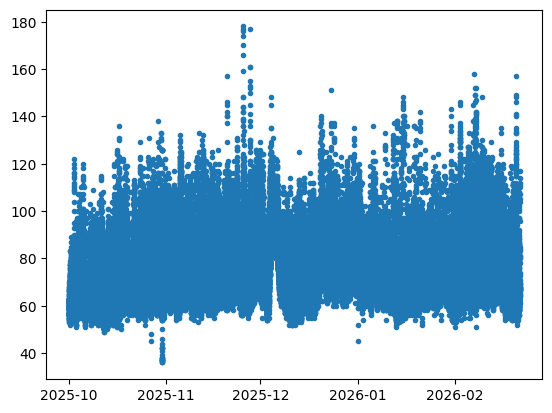

In [69]:
import matplotlib.pyplot as plt
plt.plot(df_hr["timestamp"],df_hr["hr_value"],'.')
plt.show()



In [70]:
df_hr.to_csv("HR_RECORDS.csv")

In [51]:
df_hrv.to_csv("HRV_RECORDS.csv")

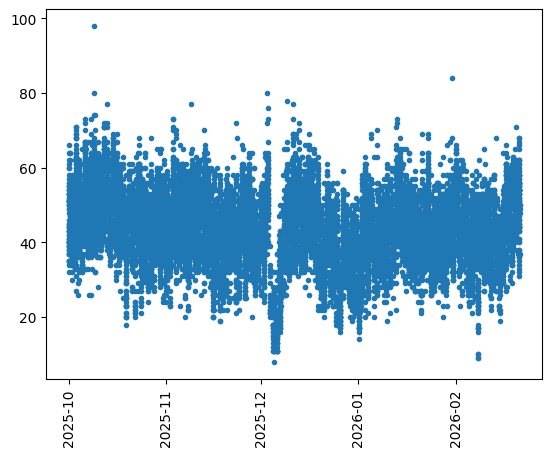

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_hrv["timestamp"],df_hrv["hrv_value"],'.')
plt.xticks(rotation=90)
plt.show()

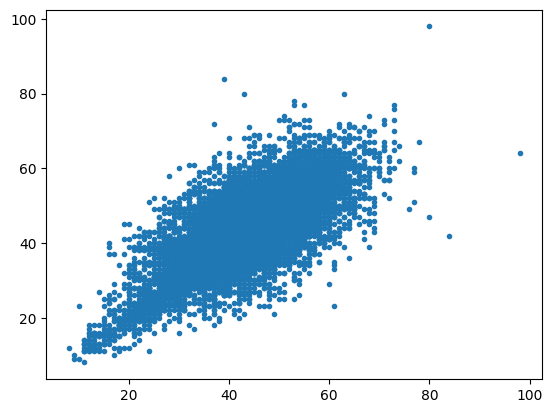

In [49]:
lag = 1
plt.plot(df_hrv["hrv_value"][:-lag],df_hrv["hrv_value"][lag:],'.')
plt.show()